# Analysis of the share Maruti Suzuki India Ltd

#### We start by importing some of the important libraries which we will be using in our Exploratory Data Analytics (EDA)

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

#### Next we load our data which is in a CSV into a pandas DataFrame

In [72]:
pf = pd.read_csv("./archive/MARUTI.csv")
pf

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.00,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.00,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.60,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.60,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.30,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.00,6638.90,6678.34,937344,6.259903e+14,74474.0,464999.0,0.4961
4423,2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.00,6568.75,6620.68,1610651,1.066360e+15,130986.0,588617.0,0.3655
4424,2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.00,6573.80,6598.62,1406270,9.279437e+14,117843.0,672435.0,0.4782
4425,2021-04-29,MARUTI,EQ,6573.80,6635.00,6647.45,6552.00,6562.00,6565.65,6580.77,757075,4.982135e+14,64393.0,352987.0,0.4663


#### We now view the list of all the columns which are available

In [73]:
pf.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

#### Next we find the list of columns which have NaN or null values

In [74]:
na_cols = pf.columns[pf.isna().any()].tolist()
na_cols

['Trades', 'Deliverable Volume', '%Deliverble']

#### We then check as to what percentage of the columns contain NaN values

In [75]:
for col in na_cols:
    null_columns = pf[col].isnull().sum()
    null_percentage = (null_columns * 100) / pf[col].shape[0]
    print("for column ",col,
          " total rows = ",pf[col].shape[0], 
          " ; empty rows = ",null_columns,
          " ; null percent : ",null_percentage)

for column  Trades  total rows =  4427  ; empty rows =  1971  ; null percent :  44.52224983058505
for column  Deliverable Volume  total rows =  4427  ; empty rows =  1  ; null percent :  0.0225886604924328
for column  %Deliverble  total rows =  4427  ; empty rows =  1  ; null percent :  0.0225886604924328


#### From the above analysis :

* Out of **4427** entries for the Trades column, **1971** entries are missing, i.e. **44.5%** of the data is missing
* Out of **4427** entries for the Deliverable Volume, **1** entries are missing, i.e. **0.0225%** of the data is missing
* Out of **4427** entries for the %Deliverables column, **1** entries are missing, i.e. **0.0225%** of the data is missing

#### Therefore, we can :
* Remove the entire column for Trades as a little less than half the data is missing
* Remove the null entries for Deliverable Volume and %Deliverables

In [76]:
pf = pf.drop("Trades", axis=1)
pf = pf.dropna()
pf.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

#### We now have 0 columns and rows with any missing data. This can be verified by checking that the number of rows has fallen by 1 and the columns 'Trades' is no longer present.

In [77]:
pf

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.00,164.30,165.95,35164283,5.835528e+14,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.00,167.00,166.74,10464179,1.744820e+14,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.60,173.35,172.45,11740117,2.024622e+14,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.60,177.95,177.91,5982324,1.064313e+14,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.30,176.20,176.88,6173689,1.092001e+14,1307694.0,0.2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.00,6638.90,6678.34,937344,6.259903e+14,464999.0,0.4961
4423,2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.00,6568.75,6620.68,1610651,1.066360e+15,588617.0,0.3655
4424,2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.00,6573.80,6598.62,1406270,9.279437e+14,672435.0,0.4782
4425,2021-04-29,MARUTI,EQ,6573.80,6635.00,6647.45,6552.00,6562.00,6565.65,6580.77,757075,4.982135e+14,352987.0,0.4663


#### Let us now check for numeric and the non-numeric columns and find how many unique values we can identify. Let us also convert the non-numeric values to numeric values where relevant.

In [78]:
for column in pf.columns:
    if pf[column].dtype == "object":
        print("Unique values in ",column," : ",pf[column].unique())
    else:
        if pf[column].dtype == "str":
            print("String column : ",column)
            try:
                pf[column] = pf[column].astype(float)
            except:
                continue

Unique values in  Date  :  ['2003-07-09' '2003-07-10' '2003-07-11' ... '2021-04-28' '2021-04-29'
 '2021-04-30']
Unique values in  Symbol  :  ['MARUTI']
Unique values in  Series  :  ['EQ']


#### We see that :

* The 'Symbol' and the 'Series' columns have only one unique value each. So we can ignore those two columns for the rest of our analysis as there is no set of groups based on those two columns

#### Our goal in this analysis is to identify whether we can predict the opening price of the stock on the next day, given the stock's parameters on the present day. So let us alter the structure of the dataframe to include the next day's opening price as the target variable in the present day's row, through the entire dataframe :

* We make a copy of the opening price column of the dataframe
* We shift the entire copied column up by 1

In [79]:
prediction_df = pf
prediction_df["PredictedOpening"] = prediction_df["Open"]
prediction_df["PredictedOpening"] = prediction_df["PredictedOpening"].shift(-1)
prediction_df = prediction_df.dropna()
prediction_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,PredictedOpening
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,8537695.0,0.2428,167.00
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,4363947.0,0.4170,167.75
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,3014852.0,0.2568,174.25
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,1949217.0,0.3258,200.00
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,1307694.0,0.2118,176.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,2021-04-23,MARUTI,EQ,6650.10,6560.00,6714.70,6560.00,6684.0,6676.10,6651.34,709306,4.717836e+14,275503.0,0.3884,6690.20
4422,2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.0,6638.90,6678.34,937344,6.259903e+14,464999.0,0.4961,6669.95
4423,2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.0,6568.75,6620.68,1610651,1.066360e+15,588617.0,0.3655,6568.75
4424,2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.0,6573.80,6598.62,1406270,9.279437e+14,672435.0,0.4782,6635.00


#### Now using the data in this DataFrame, let us see what variables are most highly influencing the predicted opening price of a share using a standard heatmap. To do this :

* First, let us create a correlation matrix
* Then we plot the correlation matrix using a heatmap
* Then we check for the most highly correlated values with our target, both -ve and +ve

In [80]:
correlation_matrix = prediction_df.corr()
correlation_matrix

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,PredictedOpening
Prev Close,1.000000,0.999939,0.999819,0.999789,0.999665,0.999677,0.999820,-0.245568,0.649704,-0.194428,0.060422,0.999625
Open,0.999939,1.000000,0.999842,0.999847,0.999696,0.999709,0.999856,-0.245365,0.649757,-0.194349,0.060353,0.999653
High,0.999819,0.999842,1.000000,0.999771,0.999876,0.999884,0.999940,-0.243611,0.655807,-0.192029,0.058581,0.999824
Low,0.999789,0.999847,0.999771,1.000000,0.999837,0.999849,0.999920,-0.246625,0.645872,-0.196562,0.060609,0.999801
Last,0.999665,0.999696,0.999876,0.999837,1.000000,0.999995,0.999943,-0.244949,0.651305,-0.194387,0.058925,0.999939
Close,0.999677,0.999709,0.999884,0.999849,0.999995,1.000000,0.999953,-0.244921,0.651446,-0.194292,0.058898,0.999940
VWAP,0.999820,0.999856,0.999940,0.999920,0.999943,0.999953,1.000000,-0.245027,0.651126,-0.194337,0.059193,0.999896
Volume,-0.245568,-0.245365,-0.243611,-0.246625,-0.244949,-0.244921,-0.245027,1.000000,0.201375,0.718717,-0.388498,-0.244773
Turnover,0.649704,0.649757,0.655807,0.645872,0.651305,0.651446,0.651126,0.201375,1.000000,0.270895,-0.134860,0.651443
Deliverable Volume,-0.194428,-0.194349,-0.192029,-0.196562,-0.194387,-0.194292,-0.194337,0.718717,0.270895,1.000000,0.113437,-0.194225


<AxesSubplot:title={'center':'Correlation Heatmap for Predicted Opening Analysis'}>

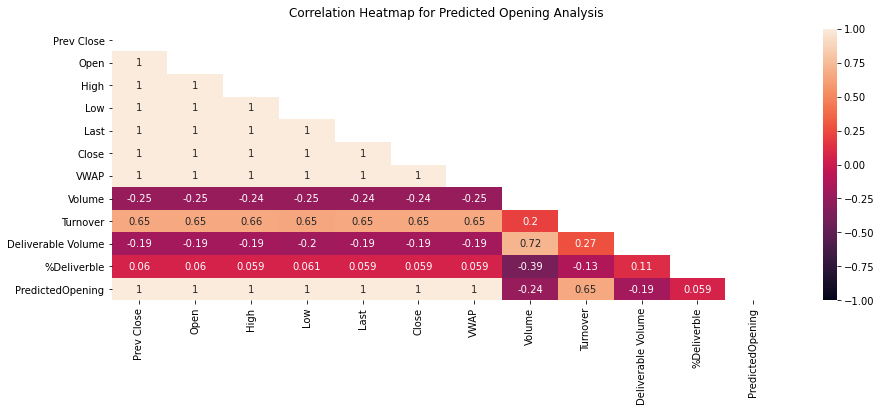

In [81]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(prediction_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Predicted Opening Analysis', fontdict={'fontsize':12}, pad=12);
heatmap

#### From the above data we can gather that :

* The values of the previous day's closing, the current day's opening, the present day's high & low and VWAP are highly and positively correlated with the predicted opening of the next day

* The Turnover of the company as observed on any day also has a decent positive correlation with the predicted opening price of the company's share

* The Volume of trade has a marginally negative correlation with the predicted opening of the share

* The Deliverable Volume also has a low negative correlation with with the predicted opening of the share

#### Therefore, we can :

* Drop all the highly & positively correlated columns, except opening and closing, as keeping the rest will be redundant

* We can drop %Deliverables which has almost no correlation with the predicted opening of the share on the next day

* Then let us replot a heatmap for the altered dataset

In [82]:
light_df = prediction_df.drop(["Prev Close","High", "Low", "Last", "%Deliverble"], axis=1)
light_df

,Date,Symbol,Series,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
0,2003-07-09,MARUTI,EQ,164.90,164.30,165.95,35164283,5.835528e+14,8537695.0,167.00
1,2003-07-10,MARUTI,EQ,167.00,167.00,166.74,10464179,1.744820e+14,4363947.0,167.75
2,2003-07-11,MARUTI,EQ,167.75,173.35,172.45,11740117,2.024622e+14,3014852.0,174.25
3,2003-07-14,MARUTI,EQ,174.25,177.95,177.91,5982324,1.064313e+14,1949217.0,200.00
4,2003-07-15,MARUTI,EQ,200.00,176.20,176.88,6173689,1.092001e+14,1307694.0,176.45
...,...,...,...,...,...,...,...,...,...,...
4421,2021-04-23,MARUTI,EQ,6560.00,6676.10,6651.34,709306,4.717836e+14,275503.0,6690.20
4422,2021-04-26,MARUTI,EQ,6690.20,6638.90,6678.34,937344,6.259903e+14,464999.0,6669.95
4423,2021-04-27,MARUTI,EQ,6669.95,6568.75,6620.68,1610651,1.066360e+15,588617.0,6568.75
4424,2021-04-28,MARUTI,EQ,6568.75,6573.80,6598.62,1406270,9.279437e+14,672435.0,6635.00


In [83]:
correlation_matrix = light_df.corr()
correlation_matrix

,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
Open,1.000000,0.999709,0.999856,-0.245365,0.649757,-0.194349,0.999653
Close,0.999709,1.000000,0.999953,-0.244921,0.651446,-0.194292,0.999940
VWAP,0.999856,0.999953,1.000000,-0.245027,0.651126,-0.194337,0.999896
Volume,-0.245365,-0.244921,-0.245027,1.000000,0.201375,0.718717,-0.244773
Turnover,0.649757,0.651446,0.651126,0.201375,1.000000,0.270895,0.651443
Deliverable Volume,-0.194349,-0.194292,-0.194337,0.718717,0.270895,1.000000,-0.194225
PredictedOpening,0.999653,0.999940,0.999896,-0.244773,0.651443,-0.194225,1.000000


<AxesSubplot:title={'center':'Updated Correlation Heatmap for Predicted Opening Analysis'}>

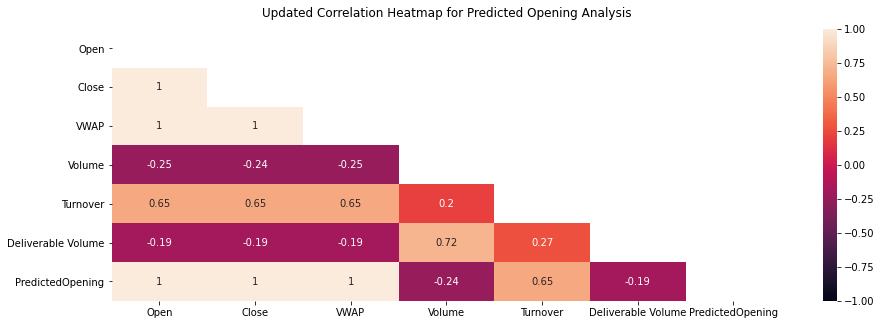

In [84]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(light_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Updated Correlation Heatmap for Predicted Opening Analysis', fontdict={'fontsize':12}, pad=12);
heatmap

#### Now let us analyse the behaviour of each of these features as against the PredictedOpening, using pair-wise plots :

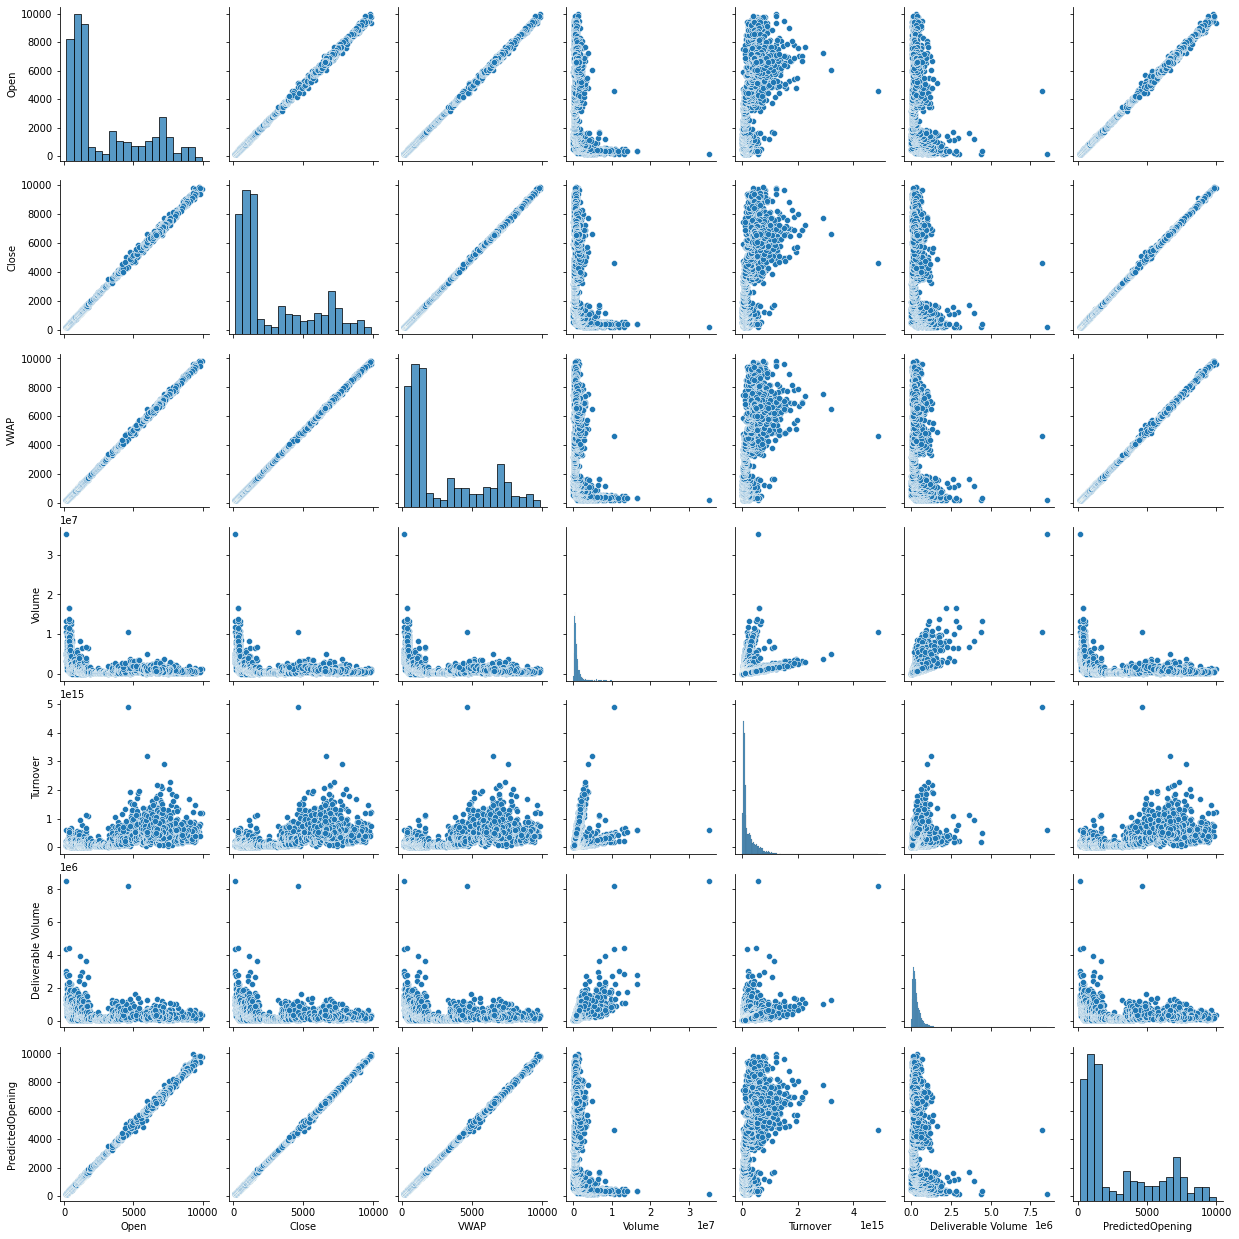

In [85]:
pair_plot = sns.pairplot(light_df)
pair_plot

#### From the above pairwise-plots, we gather that :

* The Opening price, closing price and the VWAP of the share are highly positively correlated and seem to have a linear correlation with the predcited opening price of the next day

* The volume and deliverable volume seem to stagnate the predicted opening, but do affect it at higher values

* The turnover seems to slightly have a positive correlation with the predicted opening

* The distribution of the data across the diagonal, for all columns, as observed in the bar plots seems to be highly right skewed. 

#### Given that our data is not normally distributed, let us see the degree to which the data is skewed and take corrective measures :

In [86]:
light_df.skew()

Open                  0.918095
Close                 0.915872
VWAP                  0.916604
Volume                5.223602
Turnover              3.291674
Deliverable Volume    7.156802
PredictedOpening      0.917042
dtype: float64

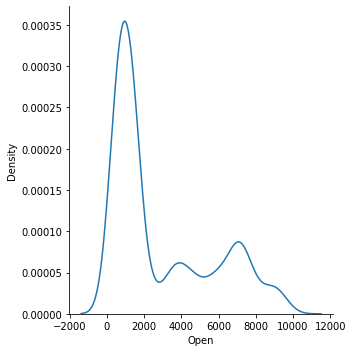

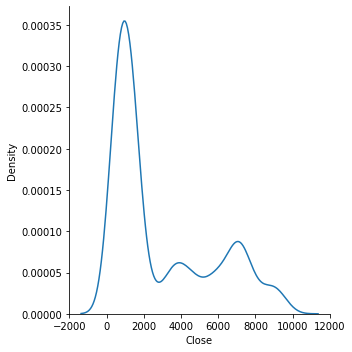

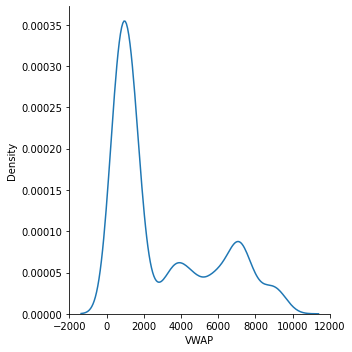

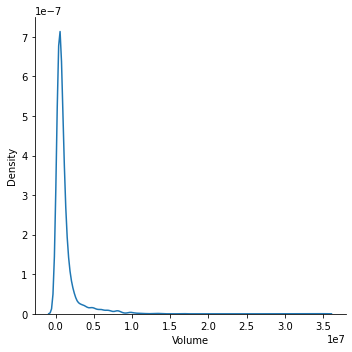

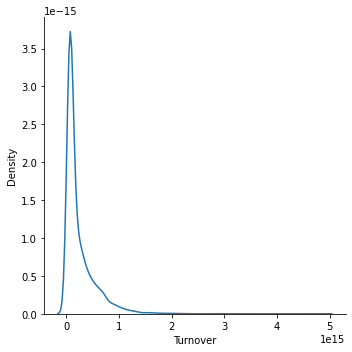

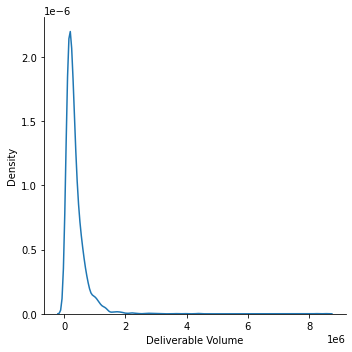

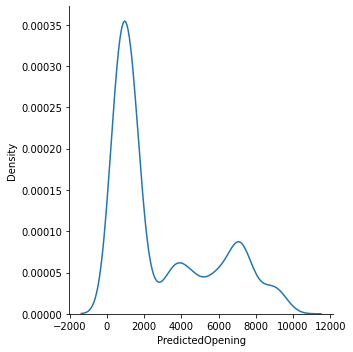

In [87]:
for col in light_df.columns:
    if light_df[col].dtype == "object":
        continue
    sns.displot(light_df[col], kind='kde')

#### We see from the above plots that the distribution of the data is heavily right skewed. To correct this, let us trim the data off the outliers using the following limits :

* Remove all the rows, where the opening price crossed 2200 rupees
* Remove all the rows, where the closing price crossed 2200 rupees
* Remove all the rows, where the VWAP crossed 2200 rupees
* Remove all the rows where the Volume crossed 2e6
* Remove all the rows where the Turnover crossed 1.8e14
* Remove all the rows where the Deliverable Volume crossed 0.8e6
* Remove all the rows where the Predicted Opening crossed 2200

In [126]:
reduced_df = light_df
reduced_df = reduced_df[reduced_df["Open"] < 2200]
reduced_df = reduced_df[reduced_df["Close"] < 2200]
reduced_df = reduced_df[reduced_df["VWAP"] < 2200]
reduced_df = reduced_df[reduced_df["Volume"] < (2*math.pow(10,6))]
reduced_df = reduced_df[reduced_df["Turnover"] < (1.8*math.pow(10,14))]
reduced_df = reduced_df[reduced_df["Deliverable Volume"] < (0.8*math.pow(10,6))]
reduced_df = reduced_df[reduced_df["PredictedOpening"] < 2200]
reduced_df

,Date,Symbol,Series,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
42,2003-09-08,MARUTI,EQ,231.00,228.75,230.58,1817991,4.191875e+13,515970.0,230.0
44,2003-09-10,MARUTI,EQ,227.75,227.80,227.91,1476667,3.365463e+13,269036.0,230.0
45,2003-09-11,MARUTI,EQ,230.00,225.65,227.66,1092801,2.487859e+13,304907.0,228.0
53,2003-09-23,MARUTI,EQ,210.30,213.15,210.92,1766451,3.725736e+13,321780.0,216.0
55,2003-09-25,MARUTI,EQ,220.10,213.70,216.23,1916650,4.144400e+13,761539.0,214.4
...,...,...,...,...,...,...,...,...,...,...
2702,2014-05-08,MARUTI,EQ,1888.00,1896.60,1892.63,180796,3.421795e+13,66787.0,1880.0
2703,2014-05-09,MARUTI,EQ,1880.00,1974.85,1953.16,457287,8.931567e+13,189982.0,1975.0
2704,2014-05-12,MARUTI,EQ,1975.00,2049.90,2029.35,555623,1.127555e+14,194832.0,2080.0
2705,2014-05-13,MARUTI,EQ,2080.00,2090.35,2091.43,528807,1.105965e+14,191570.0,2092.0


#### Using this trimmed dataset, let us now look at the distributions of the individual columns :

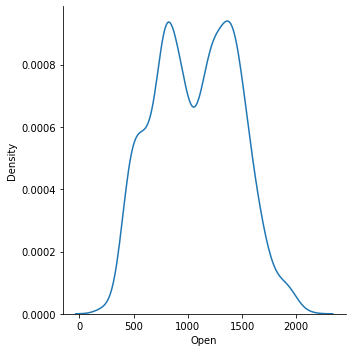

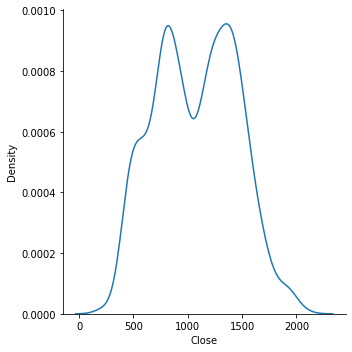

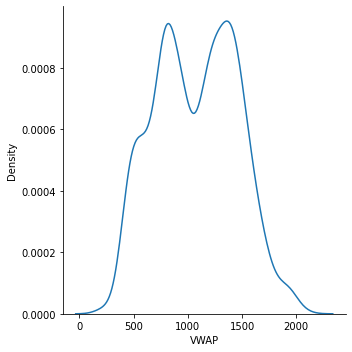

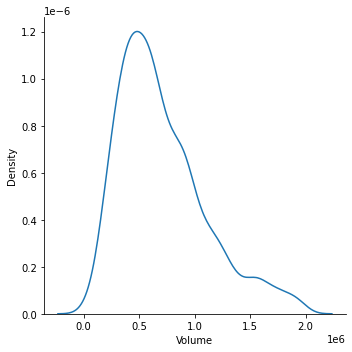

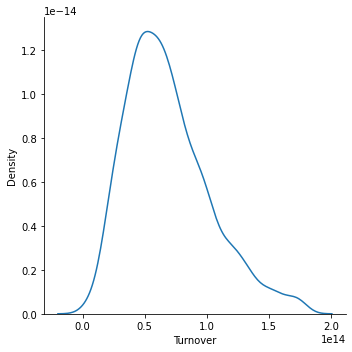

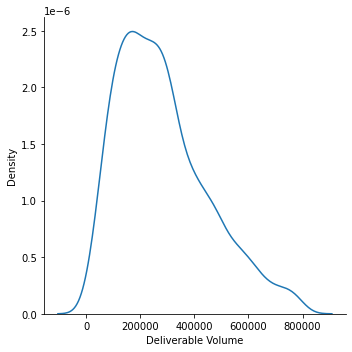

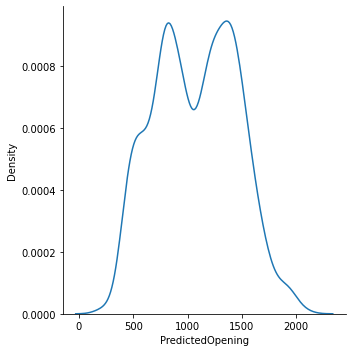

In [127]:
for col in reduced_df.columns:
    if reduced_df[col].dtype == "object":
        continue
    sns.displot(reduced_df[col], kind='kde')

#### We can see from the above images that the distributions seem to follow a far more normal form of distribution than was observed earlier. Now let us plot the updated pairwise plots to see the behaviours :

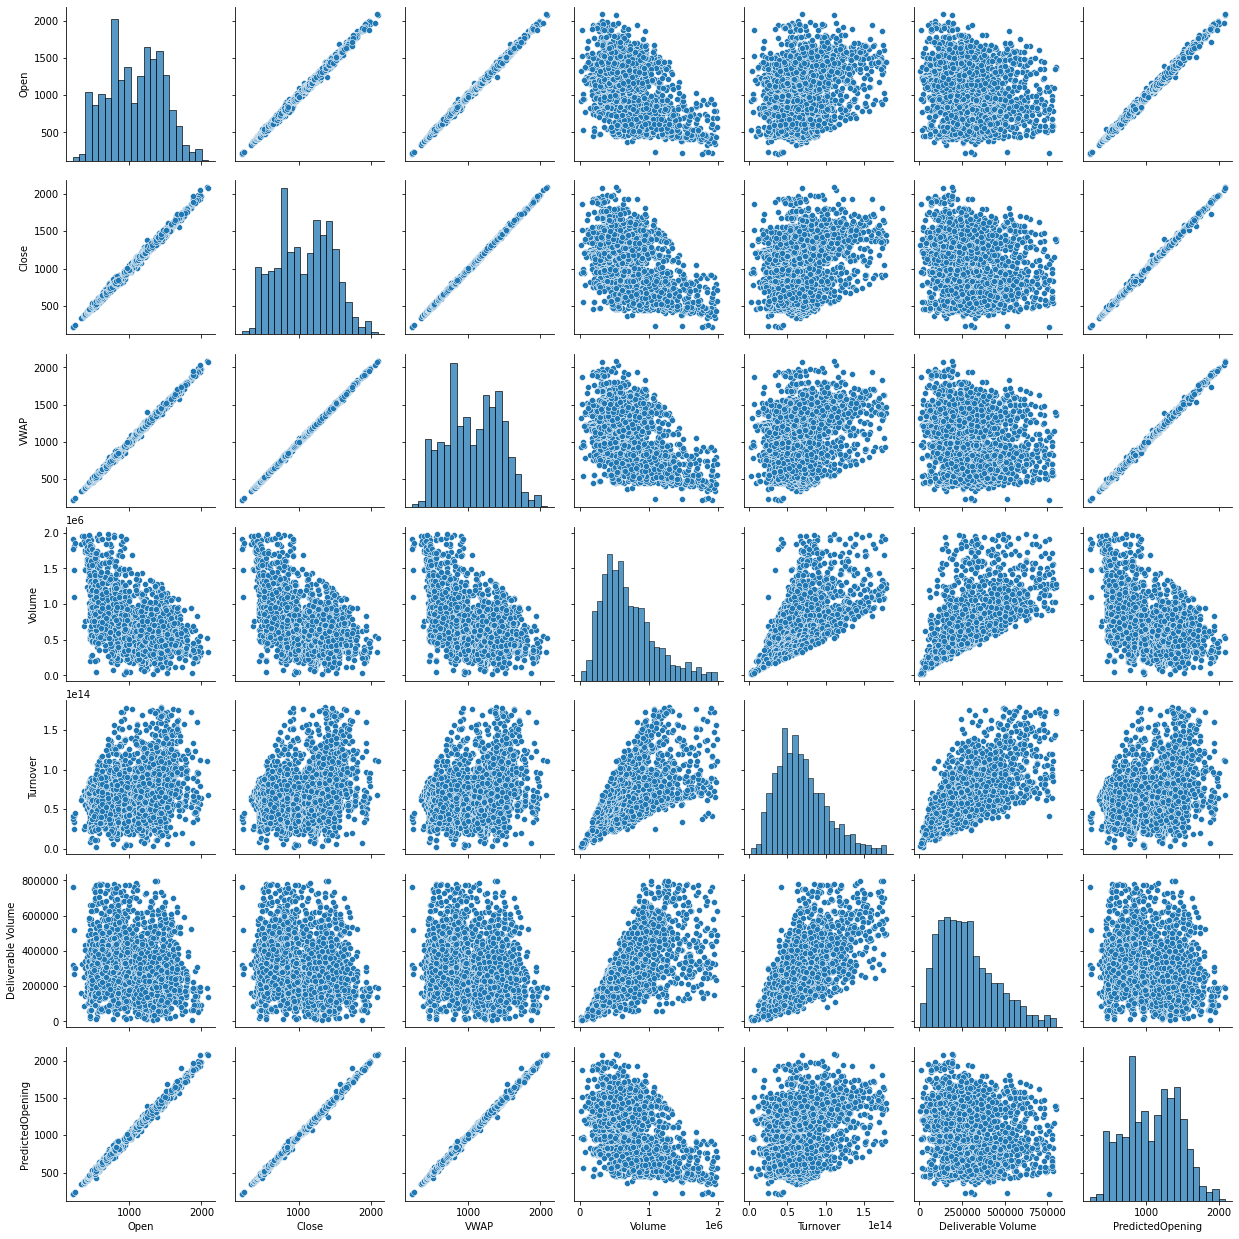

In [96]:
pair_plot = sns.pairplot(reduced_df)
pair_plot

#### We see from the above graphs that the relation between each of the variables and most importantly the predicted opening and the input feature variables is far more clearly visible. Now we can utilize this balanced dataset to perform our Regression analysis and identify which of the features we can use, in order to train our predictive regression model :

In [97]:
input_data = reduced_df.loc[:, ~reduced_df.columns.isin(['PredictedOpening', 'Date', 'Symbol', 'Series'])]
output_data = reduced_df.loc[:, reduced_df.columns.isin(['PredictedOpening'])]
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [100]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
r2s = r2_score(y_test['PredictedOpening'], predictions)
mse = mean_squared_error(y_test, predictions, squared=False)
print("The R-Squared Score = ",r2s)
print("This roughly translates to an accuracy = ",(r2s*100))
print("The root mean squared error of the predictions = ",mse)

The R-Squared Score =  0.9258770020869825
This roughly translates to an accuracy =  92.58770020869825
The root mean squared error of the predictions =  101.06462532545432


<ipython-input-100-725f600e0f2b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


#### The above indicates an exceptional model which has an R2 score of 0.9258. Let us now test this model on a dataset on which the model has not been trained :

In [101]:
input_data = light_df.loc[:, ~light_df.columns.isin(['PredictedOpening', 'Date', 'Symbol', 'Series'])]
output_data = light_df.loc[:, light_df.columns.isin(['PredictedOpening'])]
ld_predictions = regr.predict(input_data)
# large_dataset_predictions
# print(output_data['PredictedOpening'])
# print(ld_predictions)
r2s = r2_score(output_data['PredictedOpening'], ld_predictions)
mse = mean_squared_error(output_data['PredictedOpening'], ld_predictions, squared=False)
print("The R-Squared Score = ",r2s)
print("This roughly translates to an accuracy = ",(r2s*100))
print("The root mean squared error of the predictions = ",mse)

The R-Squared Score =  -0.18801654269146284
This roughly translates to an accuracy =  -18.801654269146283
The root mean squared error of the predictions =  2992.219245402041


#### The above results indicate that out model has failed for the dataset which consists of all the data, including the outliers. So we, can now attempt to train a second model on the data which we removed in our reduced dataset :

In [129]:
new_reduced = light_df
new_reduced = new_reduced[~(new_reduced.Date.isin(reduced_df['Date']))]
new_reduced

,Date,Symbol,Series,Open,Close,VWAP,Volume,Turnover,Deliverable Volume,PredictedOpening
0,2003-07-09,MARUTI,EQ,164.90,164.30,165.95,35164283,5.835528e+14,8537695.0,167.00
1,2003-07-10,MARUTI,EQ,167.00,167.00,166.74,10464179,1.744820e+14,4363947.0,167.75
2,2003-07-11,MARUTI,EQ,167.75,173.35,172.45,11740117,2.024622e+14,3014852.0,174.25
3,2003-07-14,MARUTI,EQ,174.25,177.95,177.91,5982324,1.064313e+14,1949217.0,200.00
4,2003-07-15,MARUTI,EQ,200.00,176.20,176.88,6173689,1.092001e+14,1307694.0,176.45
...,...,...,...,...,...,...,...,...,...,...
4421,2021-04-23,MARUTI,EQ,6560.00,6676.10,6651.34,709306,4.717836e+14,275503.0,6690.20
4422,2021-04-26,MARUTI,EQ,6690.20,6638.90,6678.34,937344,6.259903e+14,464999.0,6669.95
4423,2021-04-27,MARUTI,EQ,6669.95,6568.75,6620.68,1610651,1.066360e+15,588617.0,6568.75
4424,2021-04-28,MARUTI,EQ,6568.75,6573.80,6598.62,1406270,9.279437e+14,672435.0,6635.00


In [132]:
input_data = new_reduced.loc[:, ~new_reduced.columns.isin(['PredictedOpening', 'Date', 'Symbol', 'Series'])]
output_data = new_reduced.loc[:, new_reduced.columns.isin(['PredictedOpening'])]
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [133]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
r2s = r2_score(y_test['PredictedOpening'], predictions)
mse = mean_squared_error(y_test, predictions, squared=False)
print("The R-Squared Score = ",r2s)
print("This roughly translates to an accuracy = ",(r2s*100))
print("The root mean squared error of the predictions = ",mse)

The R-Squared Score =  0.9590034912184924
This roughly translates to an accuracy =  95.90034912184923
The root mean squared error of the predictions =  590.0582822492121


<ipython-input-133-725f600e0f2b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)
